\setcounter{secnumdepth}{0}

## STAT 207: Singular Value Decomposition

#### Zhe Fei (zhe.fei@ucr.edu)

- NAS Chapter 9

In many modern applications involving large data sets, statisticians are
confronted with a large $m\times n$ matrix $X = (x_{ij})$ that encodes $n$ features on
each of $m$ objects. 

- In gene microarray studies $x_{ij}$ represents the expression level of the $i$th gene under the $j$th experimental condition.

- In information retrieval, $x_{ij}$ represents the frequency of the $j$th word or term in the $i$th document.

The singular value decomposition (SVD) captures the structure of such matrices. 


For a $m\times m$ symmetric matrix $A$, $A = U\Sigma U^T$ with $U = (u_1,...,u_m)$ gives
$$
A = \sum_{j=1}^m \sigma_j u_j u_j^T.
$$
When $\sigma_j = 0$ for $j>k$, $A$ has rank $k$.

SVD generalizes the spectral theorem to nonsymmetric matrices.
$$\label{svd}\tag{1}
A = \sum_{j=1}^k \sigma_j u_j v_j^T = U\Sigma V^T.
$$

If $A$ is $m\times n$, then write the SVD as
$$A = \begin{pmatrix}
u_1 & \cdots & u_k & u_{k+1} & \cdots & u_m
\end{pmatrix}
\begin{pmatrix}
\sigma_1 & 0 & \cdots & 0 & 0 & \cdots & 0 \\
0 & \sigma_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots& \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \sigma_k & 0 & \cdots & 0 \\
0 & 0 & \cdots & 0  &0 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 0 & 0 & \cdots & 0 \\
\end{pmatrix}
\begin{pmatrix}
v_{1}^T \\
\vdots \\
v_{k}^T \\
v_{k+1}^T \\
\vdots \\
v_{n}^T \\
\end{pmatrix},
$$
assuming $k < \min\{m, n\}$. The scalars $\sigma_1, \ldots, \sigma_k$ are said to be **singular values** and conventionally are listed in decreasing order. The vectors $u_1, . . . , u_k$
are known as **left singular vectors** and the vectors $v_1, . . . , v_k$ as **right singular
vectors**. 

### Basic Properties of the SVD


**NAS Proposition 9.2.1** Every $m \times n$ matrix $A$ has a singular value decomposition of the form (\ref{svd}) with positive diagonal entries for $\Sigma$.

Proof by induction.

Further we have
$$
\begin{aligned}
A^T &= \sum_{j=1}^{k} \sigma_j v_j u_j^T \\
A A^T &= \sum_{j=1}^{k} \sigma_j^2 u_j u_j^T \\
A^T A &= \sum_{j=1}^{k} \sigma_j^2 v_j v_j^T \\
\end{aligned}$$
Hence, $A A^T$ has nonzero eigenvalue $\sigma_j^2$ with corresponding eigenvector $u_j$, and $A^T A$ has nonzero eigenvalue $\sigma_j^2$ with corresponding eigenvector $v_j$.

The following partial inverse is important in practice:

**NAS Proposition 9.2.2** The Moore-Penrose inverse $A^- = \sum_{j=1}^k \sigma_j^{-1} v_ju^T_j$

enjoys the properties
$$
(AA^-)^T = AA^- \\
(A^-A)^T = A^-A \\
AA^-A = A \\
A^-AA^- = A^-.
$$
If $A$ is square and invertible, then $A^- = A^{-1}$. If A has full column rank,
then $A^- = (A^TA)^{-1}A^T$.

**NAS Proposition 9.2.3** Suppose the matrix $A$ has full SVD $U\Sigma V^T$ with the diagonal entries $\sigma_i$ of $\Sigma$ appearing in decreasing order. The best rank-$k$ approximation of $A$ in the Frobenius norm is
$$
B = \sum_{j=1}^k \sigma_j u_j v_j^T.
$$
Furthermore, $\Vert A - B \Vert_F = \sqrt{\sum_{i>k} \sigma_i^2}$ and $\Vert A - B \Vert_2 = \sigma_{k+1}$.





### Applications

#### Ridge Regression

In ridge regression, we minimize the penalized sum of squares 
$$
\begin{aligned}
f(\lambda) &= \|y - X\beta\|_2^2 + \lambda\|\beta\|_2^2 \\
&= (y - X\beta)^T(y - X\beta) + \lambda\beta^T\beta.
\end{aligned}
$$

The gradient of $f(\lambda)$ is
$$
\nabla f(\lambda) = -2X^T(y - X\beta) + 2\lambda\beta.
$$

Revised normal equations
$$
(X^TX + \lambda I)\beta = X^Ty,
$$
with solution
$$
\hat{\beta} = (X^TX + \lambda I)^{-1}X^Ty.
$$
If we further write $X = \sum_{j}\sigma_j u_jv_j^T$, then
$$
X^Ty = \sum_{j}\sigma_j u_j(u_j^Ty), \quad X^TX + \lambda I = \sum_{j} (\sigma_j^2 + \lambda) v_jv_j^T.
$$
The parameter estimates and predicted values reduce to
$$
\hat{\beta} = \sum_{j}\frac{\sigma_j}{\sigma_j^2 + \lambda}u_j^Ty v_j, \\
\hat{y} = X\hat{\beta} = \sum_{j}\frac{\sigma_j^2}{\sigma_j^2 + \lambda}(u_j^Ty)u_j.
$$


#### Image Compression

An image (scene) is recorded as an $m \times n$ matrix $A = (a_{ij})$ of intensities.

- The entry $a_{ij}$ represents the brightness of the pixel (picture element) in row $i$ and column $j$ of the scene.

- Storage issue when $m$ and $n$ are large

- Low rank approximate of $B = (b_{ij})$



In [1]:
import numpy as np
from PIL import Image

def compress_image(image_path, k):
    # Load the image and convert to grayscale
    image = Image.open(image_path).convert('L')
    
    # Convert the image to a numpy array
    A = np.array(image)
    print('Original size', A.shape)
    
    # Apply the SVD to the image
    U, S, Vt = np.linalg.svd(A)
    
    # Truncate SVD matrices to retain only the k largest singular values
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    Vt_k = Vt[:k, :]
        
    # Reconstruct the compressed image
    B = U_k @ S_k @ Vt_k
    
    # Convert the numpy array back to an image
    compressed_image = Image.fromarray(B.astype('uint8'), 'L')
    
    return compressed_image


Original size (920, 684)


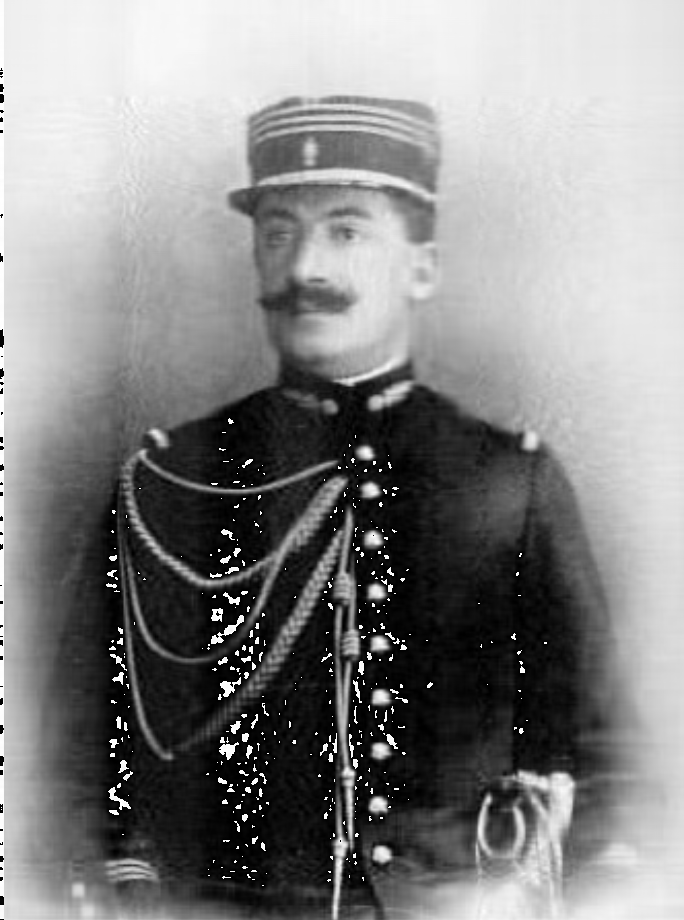

In [2]:
# Example usage
compressed_image = compress_image('cholesky.png', k=50)
compressed_image

Original size (920, 684)


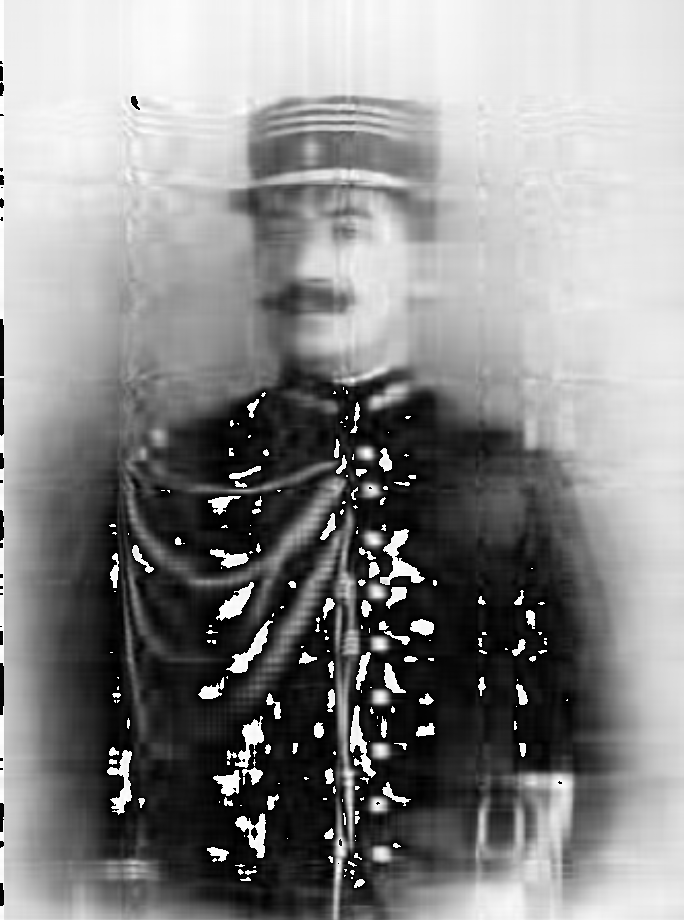

In [3]:
# Example usage
compressed_image = compress_image('cholesky.png', k=20)
compressed_image

#### Principal Components

For a random vector $Y$ with $E(Y) = 0$ and variance matrix $Var(Y)$, the first principal component $v_1^TY$ is the linear combination that maximizes
$$
Var(v^T Y) = v^T Var(Y) v.
$$

With a centered random sample $x_1,..,x_m$, the sample variance is $X^TX$ with
$$
X = \frac{1}{\sqrt{m}} \begin{pmatrix}
x_{1}^T\\
.\\
.\\
.\\
x_{m}^T
\end{pmatrix}
= \sum_j \sigma_j u_j v_j^T.
$$

The $i$th principal direction is given by the unit eigenvector $v_i$, and the variance of $v_i^Tx_j$ over $j$ is given by $\sigma_i^2$.


### Jacobi’s Algorithm for the SVD

By modifying the algorithm for eigen-decomposition, but without the need to calculate $A^T A$.

<br>
<br>
<br>
<br>
<br>

### Python Implementations

In [4]:
import numpy as np

# generate a random matrix
A = np.random.randint(1, 10, size=(4,3))
A

array([[6, 3, 5],
       [6, 8, 4],
       [3, 7, 4],
       [6, 9, 4]])

In [5]:
# compute the SVD of A
U, s, Vt = np.linalg.svd(A)

print(s)
# check that U and Vt are orthogonal and s is a diagonal matrix
print(np.allclose(np.eye(4), np.dot(U.T, U)))
print(np.allclose(np.eye(3), np.dot(Vt, Vt.T)))

[19.36331759  3.96410117  1.53226432]
True
True


In [6]:
# compute the eigenvalues and eigenvectors of A
B = A.T@A
w, v = np.linalg.eig(B)

print(w)
print(np.allclose(np.dot(w[0],v[:,0]), B@v[:,0]))
print(np.allclose(np.dot(w[1],v[:,1]), B@v[:,1]))

[374.93806795   2.34783396  15.71409809]
True
True


In [7]:
w2, v2 = np.linalg.eig(A@A.T)

np.sum(w2)

392.99999999999955